# **Présentation de notre projet**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [122]:
nombre_patient = 15
nombre_docteur = 10

In [123]:
def position (n):
    return (np.random.uniform(0,1,size = (n)), np.random.uniform(0,1,size = (n)))
    

In [124]:
position_docteur = position(nombre_docteur)
position_patient = position(nombre_patient)
position_docteur

(array([0.80227725, 0.98033089, 0.63384309, 0.20926494, 0.08998765,
        0.32284366, 0.70634   , 0.77537146, 0.5310411 , 0.09997366]),
 array([0.47153912, 0.54304752, 0.60957595, 0.73988034, 0.08645211,
        0.93118501, 0.44648459, 0.94272884, 0.25727438, 0.05064484]))

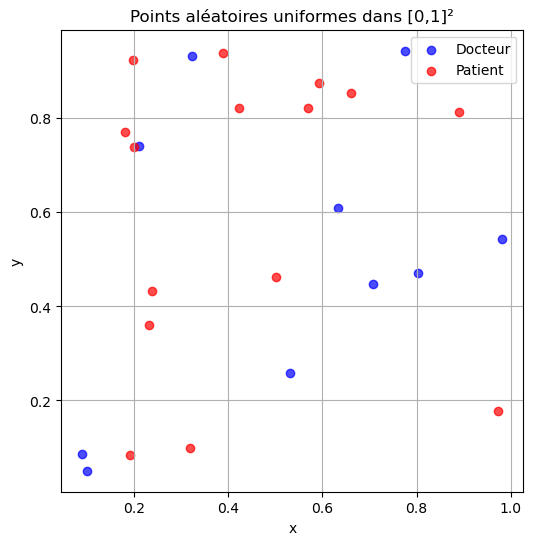

In [125]:
#On représente les points sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [153]:
matrice_distance = np.zeros((nombre_docteur, nombre_patient))
for i in range(nombre_docteur):
    for j in range(nombre_patient):
        matrice_distance[i,j] = np.sqrt((position_patient[1][j]-position_docteur[1][i])**2+(position_patient[0][j]-position_docteur[0][i])**2)
matrice_distance

array([[0.3002833 , 0.62401756, 0.65870539, 0.35311099, 0.75385696,
        0.45453237, 0.61071092, 0.40591778, 0.72276427, 0.58056034,
        0.56474027, 0.41897458, 0.68988128, 0.33972218, 0.51612413],
       [0.48502844, 0.71181877, 0.80456046, 0.28495301, 0.86945896,
        0.51042941, 0.7970414 , 0.44449372, 0.91210947, 0.7698622 ,
        0.74960452, 0.49511828, 0.83155747, 0.36546986, 0.62360764],
       [0.19791977, 0.4104786 , 0.45266564, 0.32775735, 0.53641174,
        0.26832206, 0.60058331, 0.24389784, 0.68624628, 0.47248185,
        0.43268401, 0.22016509, 0.48105352, 0.54898011, 0.2989216 ],
       [0.4038506 , 0.26784444, 0.0100063 , 0.68516512, 0.18245898,
        0.40605425, 0.65109473, 0.46519439, 0.65539991, 0.38029853,
        0.30836917, 0.36972664, 0.04187647, 0.94811974, 0.22705097],
       [0.55748162, 0.90313989, 0.66005796, 1.08134578, 0.84245179,
        0.93466048, 0.22935086, 0.95488737, 0.1017677 , 0.30869139,
        0.37711056, 0.87698696, 0.6897267 , 

In [166]:
#On calcule maintenant alpha_i et psi_j
alpha = 0.1*np.random.randint(0,3,size=nombre_patient)
psi = 0.1*np.random.randint(0,3,size=nombre_docteur)
alpha,psi

(array([0. , 0. , 0. , 0.1, 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. , 0.2,
        0. , 0. ]),
 array([0. , 0.1, 0.1, 0.2, 0. , 0. , 0. , 0. , 0.1, 0. ]))

In [172]:
#On va maintenant générer Yij
lien = np.zeros((nombre_docteur, nombre_patient))
for i in range(nombre_docteur):
    for j in range(nombre_patient):
        lien[i,j] = np.random.binomial(1,1/(1+np.exp(0.5*matrice_distance[i,j]+alpha[j]-psi[i]+np.random.normal(0,1))))
lien

array([[1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.]])

/tmp/ipykernel_25926/2314824454.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][i], position_patient[0][j]], [position_docteur[1][i], position_patient[1][j]], 'k-',alpha=0.5,color="green")


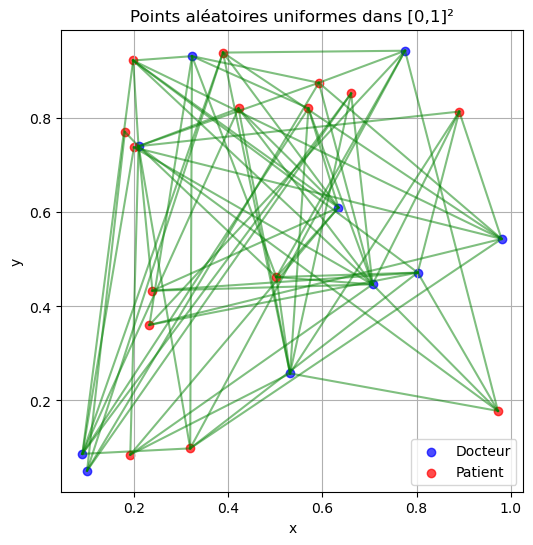

In [173]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_docteur):
    for j in range(nombre_patient):
        if lien[i,j] == 1:
            plt.plot([position_docteur[0][i], position_patient[0][j]], [position_docteur[1][i], position_patient[1][j]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [174]:
#On va maintenant faire la regression de Yij sur Xij, alpha_i et psi_j
model = LogisticRegression()
model.fit(matrice_distance.reshape(-1,1),lien.reshape(-1,1))
y_pred = model.predict(lien.reshape(-1,1))
y_pred

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [177]:
#On regarde la distance entre la prédiction et la réalité
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

0.0